In [1]:
import pandas as pd 
import json
import re 
dataset = pd.read_csv('../data/pure_classes/false dilemma_keywords.csv')
cskg_dim = pd.read_csv('../data/cskg_nodes.csv')

In [2]:
def find_keywords(line): 
  findings = re.findall('\'(\w+\s+\w+)\'|\'(\w+)\'', line) 
 
  if len(findings)>=1: 
    keywords = [] 
    for fact in findings: 
      if len(fact[0])>=1:
        keywords.append(fact[0].lower()) 
      if len(fact[1])>=1:
        keywords.append(fact[1].lower()) 
    return keywords 
  return [] 


In [3]:
relations = cskg_dim['relation'].unique().tolist() 
print("Number of Unique Relations:" , len(relations)) 
relation_stats = [0]*len(relations)
stats_for_one_hop_relations = dict(zip(relations, relation_stats)) 
type_of_one_hop_relations = {
  'empty': 0, 
  'non-empty':0
}
number_of_one_hops = [] 

stats_for_two_hop_relations_left= dict(zip(relations, relation_stats)) 
stats_for_two_hop_relations_right= dict(zip(relations, relation_stats)) 
type_of_two_hop_relations = {
  'empty': 0, 
  'non-empty':0
}

Number of Unique Relations: 48


In [4]:
choice_1 = dataset['choice_1_not_stemmed'].to_list()
choice_2 = dataset['choice_2_not_stemmed'].to_list() 

choice_1 = [ find_keywords(word_1) for word_1 in choice_1] 
choice_2 = [ find_keywords(word_2) for word_2 in choice_2] 

In [5]:
def one_hop_relation(word_1, word_2): 
  result_1 = cskg_dim.loc[cskg_dim['node_1_label']==word_1 ]
  result_2 = result_1.loc[result_1['node_2_label']==word_2]
  result_3 = cskg_dim.loc[cskg_dim['node_2_label']==word_1 ]
  result_4 = result_3.loc[result_3['node_1_label']==word_2]
  combined_results = pd.concat([result_2, result_4], ignore_index=True) 
  return combined_results['relation'].unique().tolist()  

def stats_for_relation(relations, type_of_relation='one_hop'):
  if type_of_relation == 'one_hop': 
    if len(relations)==0: 
      type_of_one_hop_relations['empty']+=1 
    else: 
      type_of_one_hop_relations['non-empty']+=1  
    number_of_one_hops.append(len(relations))
    if len(relations)>0: 
      for relation in relations: 
        
        stats_for_one_hop_relations[relation]+=1 
  else: 
    if len(relations)==0: 
      type_of_two_hop_relations['empty']+=1 
    else: 
      type_of_two_hop_relations['non-empty']+=1 
    if len(relations)>0: 
      left_side_relation = relations['relation_x'].unique().tolist() 
      for relation in left_side_relation: 
        stats_for_two_hop_relations_left[relation]+=1 
      right_side_relation = relations['relation_y'].unique().tolist() 
      for relation in right_side_relation: 
        stats_for_two_hop_relations_right[relation]+=1 
      
        
def two_hop_relations(word_1, word_2): 
  result_1 = cskg_dim.loc[cskg_dim['node_1_label']==word_1 ]
  result_2 = cskg_dim.loc[cskg_dim['node_2_label']==word_2 ]
  common_relations = pd.merge(result_1, result_2, left_on='node_2_label', right_on='node_1_label')
  if len(common_relations)>0: 

    return common_relations
  return []   


One Hop Relations between words
<p>
Format for storage : (keyword_1, keyword_2,\[relations\])
</p>

In [24]:
one_hop_relations_keywords = []
for i in range(len(choice_1)): 
  keyword_list_1 = choice_1[i] 
  keyword_list_2 = choice_2[i]
  relations = []
  for word_1 in keyword_list_1: 
    for word_2 in keyword_list_2: 
      if word_1!=word_2:
        results = one_hop_relation(word_1, word_2)
        stats_for_relation(results)
        if len(results) > 0: 
          relations.append((word_1, word_2, results)) 
  one_hop_relations_keywords.append(relations) 
  print(i)
      
      


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


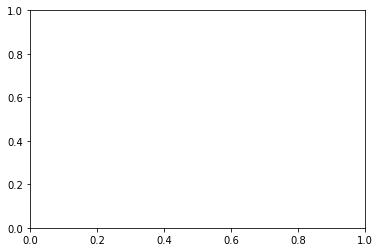

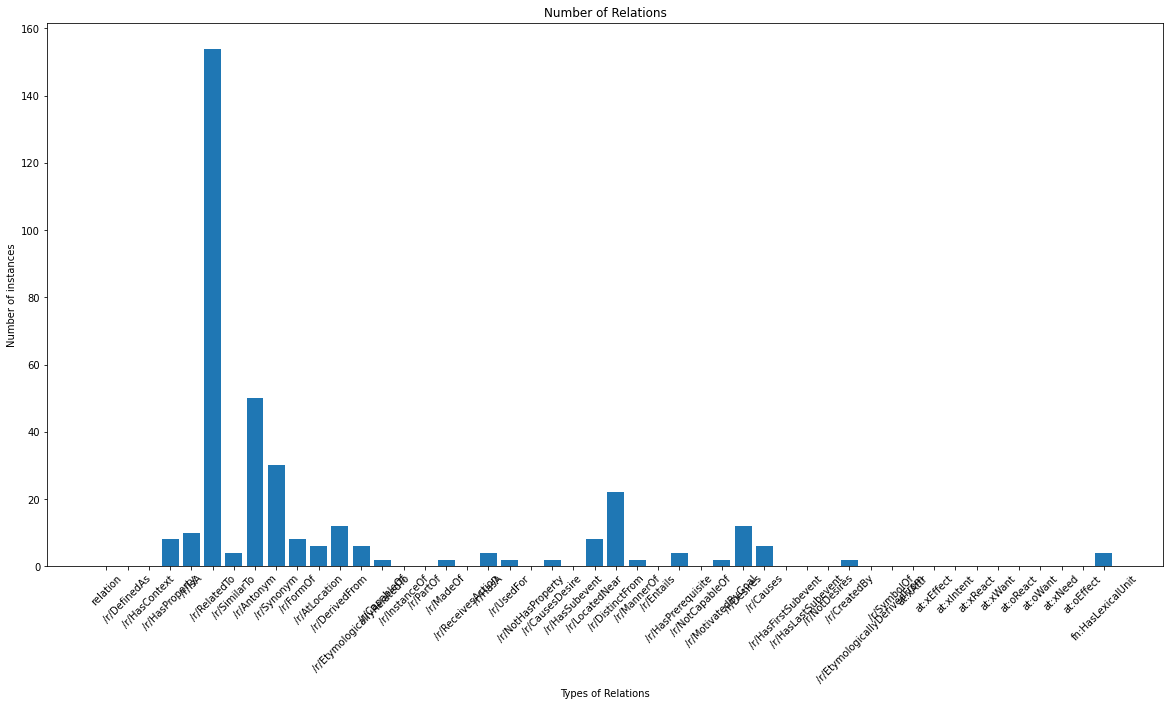

In [25]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

plt.figure(figsize=(20,10))
plt.bar(stats_for_one_hop_relations.keys(), stats_for_one_hop_relations.values())
plt.title("Number of Relations")
plt.xlabel("Types of Relations")
plt.ylabel("Number of instances")

plt.xticks(rotation=45)

plt.show()


In [26]:
print("Top 10 relations with non zero values: ") 
sorted(stats_for_one_hop_relations.items(), key=lambda x: x[1], reverse=True)

Top 10 relations with non zero values: 


[('/r/RelatedTo', 154),
 ('/r/Antonym', 50),
 ('/r/Synonym', 30),
 ('/r/DistinctFrom', 22),
 ('/r/DerivedFrom', 12),
 ('/r/Desires', 12),
 ('/r/IsA', 10),
 ('/r/HasProperty', 8),
 ('/r/FormOf', 8),
 ('/r/LocatedNear', 8),
 ('/r/AtLocation', 6),
 ('/r/EtymologicallyRelatedTo', 6),
 ('/r/Causes', 6),
 ('/r/SimilarTo', 4),
 ('/r/HasA', 4),
 ('/r/HasPrerequisite', 4),
 ('fn:HasLexicalUnit', 4),
 ('/r/CapableOf', 2),
 ('/r/MadeOf', 2),
 ('/r/UsedFor', 2),
 ('/r/CausesDesire', 2),
 ('/r/MannerOf', 2),
 ('/r/MotivatedByGoal', 2),
 ('/r/CreatedBy', 2),
 ('relation', 0),
 ('/r/DefinedAs', 0),
 ('/r/HasContext', 0),
 ('/r/InstanceOf', 0),
 ('/r/PartOf', 0),
 ('/r/ReceivesAction', 0),
 ('/r/NotHasProperty', 0),
 ('/r/HasSubevent', 0),
 ('/r/Entails', 0),
 ('/r/NotCapableOf', 0),
 ('/r/HasFirstSubevent', 0),
 ('/r/HasLastSubevent', 0),
 ('/r/NotDesires', 0),
 ('/r/EtymologicallyDerivedFrom', 0),
 ('/r/SymbolOf', 0),
 ('at:xAttr', 0),
 ('at:xEffect', 0),
 ('at:xIntent', 0),
 ('at:xReact', 0),
 ('at

In [27]:
type_of_one_hop_relations

{'empty': 2822, 'non-empty': 224}

In [10]:
two_hop_relations_keywords = []
for i in range(len(choice_1)): 
  keyword_list_1 = choice_1[i] 
  keyword_list_2 = choice_2[i]
  relations = []
  for word_1 in keyword_list_1: 
    for word_2 in keyword_list_2: 
      results = two_hop_relations(word_1, word_2)
      stats_for_relation(results, type_of_relation='two-hop')
      if len(results)>0:

        relations.append(results) 
      
  two_hop_relations_keywords.append(relations) 
  print(i)
      

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [11]:
stats_for_two_hop_relations_left
print("Top 10 relations with non zero values for two hop on left: ") 
sorted(stats_for_two_hop_relations_left.items(), key=lambda x: x[1], reverse=True)

Top 10 relations with non zero values for two hop on left: 


[('/r/RelatedTo', 455),
 ('/r/Synonym', 416),
 ('/r/Antonym', 199),
 ('/r/IsA', 150),
 ('/r/LocatedNear', 131),
 ('/r/MannerOf', 87),
 ('/r/DistinctFrom', 79),
 ('/r/AtLocation', 59),
 ('/r/UsedFor', 46),
 ('/r/HasContext', 36),
 ('/r/CapableOf', 36),
 ('/r/HasA', 32),
 ('/r/EtymologicallyRelatedTo', 30),
 ('/r/SimilarTo', 27),
 ('/r/CausesDesire', 21),
 ('/r/HasPrerequisite', 21),
 ('/r/DerivedFrom', 19),
 ('/r/Causes', 19),
 ('/r/HasProperty', 17),
 ('/r/Desires', 16),
 ('/r/PartOf', 15),
 ('fn:HasLexicalUnit', 14),
 ('/r/HasSubevent', 12),
 ('/r/Entails', 11),
 ('/r/MotivatedByGoal', 10),
 ('/r/MadeOf', 9),
 ('/r/FormOf', 8),
 ('/r/HasFirstSubevent', 8),
 ('/r/NotDesires', 8),
 ('/r/HasLastSubevent', 7),
 ('/r/CreatedBy', 7),
 ('/r/ReceivesAction', 3),
 ('/r/NotHasProperty', 2),
 ('relation', 0),
 ('/r/DefinedAs', 0),
 ('/r/InstanceOf', 0),
 ('/r/NotCapableOf', 0),
 ('/r/EtymologicallyDerivedFrom', 0),
 ('/r/SymbolOf', 0),
 ('at:xAttr', 0),
 ('at:xEffect', 0),
 ('at:xIntent', 0),
 (

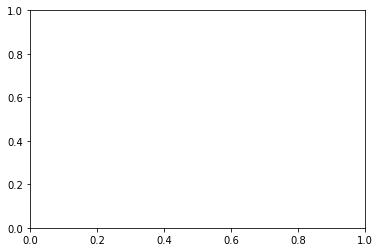

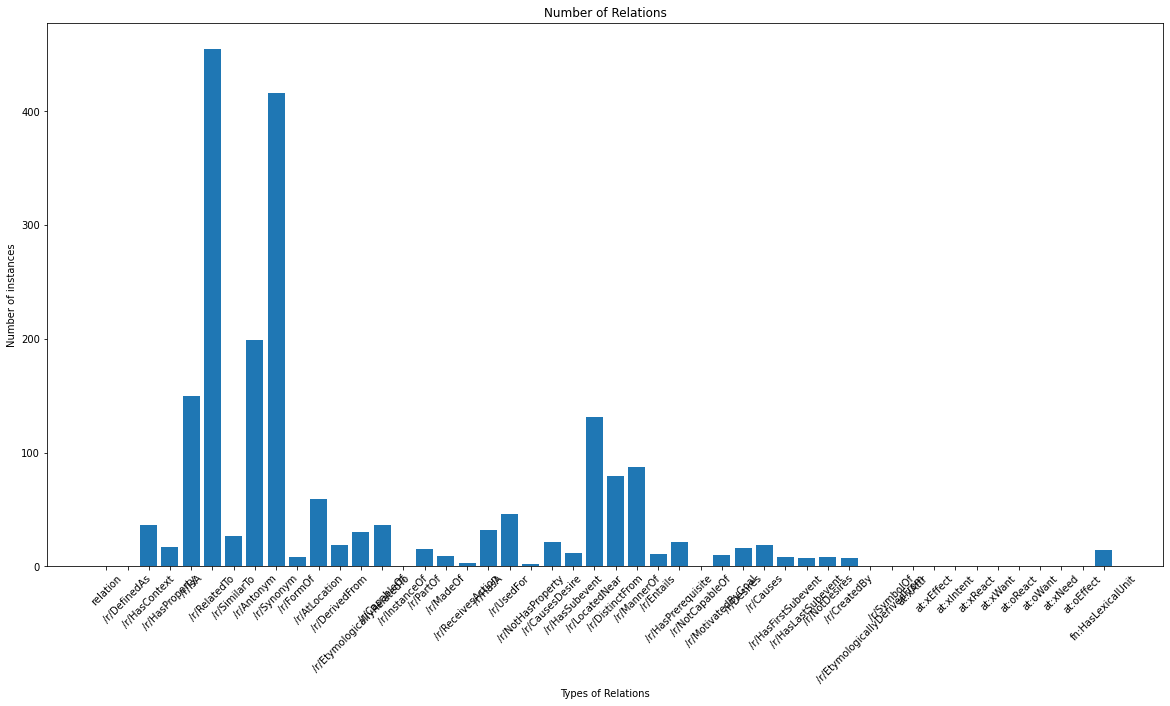

In [12]:
f, ax = plt.subplots()

plt.figure(figsize=(20,10))
plt.bar(stats_for_two_hop_relations_left.keys(), stats_for_two_hop_relations_left.values())
plt.title("Number of Relations")
plt.xlabel("Types of Relations")
plt.ylabel("Number of instances")

plt.xticks(rotation=45)

plt.show()

In [13]:
stats_for_two_hop_relations_right
print("Top 10 relations with non zero values for two hop on right: ") 
sorted(stats_for_two_hop_relations_right.items(), key=lambda x: x[1], reverse=True)

Top 10 relations with non zero values for two hop on right: 


[('/r/RelatedTo', 487),
 ('/r/Synonym', 384),
 ('/r/Antonym', 185),
 ('/r/LocatedNear', 133),
 ('/r/IsA', 100),
 ('/r/DerivedFrom', 91),
 ('/r/DistinctFrom', 84),
 ('/r/MannerOf', 77),
 ('fn:HasLexicalUnit', 68),
 ('/r/FormOf', 54),
 ('/r/AtLocation', 54),
 ('/r/UsedFor', 52),
 ('/r/EtymologicallyRelatedTo', 40),
 ('/r/SimilarTo', 39),
 ('/r/HasContext', 38),
 ('/r/PartOf', 33),
 ('/r/HasPrerequisite', 31),
 ('/r/MotivatedByGoal', 25),
 ('/r/CapableOf', 23),
 ('/r/Desires', 23),
 ('/r/Causes', 21),
 ('/r/HasA', 20),
 ('/r/HasSubevent', 17),
 ('/r/HasProperty', 16),
 ('/r/Entails', 14),
 ('/r/CausesDesire', 11),
 ('/r/NotDesires', 9),
 ('/r/NotHasProperty', 6),
 ('/r/HasLastSubevent', 6),
 ('/r/MadeOf', 4),
 ('/r/HasFirstSubevent', 4),
 ('/r/ReceivesAction', 2),
 ('/r/CreatedBy', 2),
 ('/r/DefinedAs', 1),
 ('/r/InstanceOf', 1),
 ('/r/EtymologicallyDerivedFrom', 1),
 ('relation', 0),
 ('/r/NotCapableOf', 0),
 ('/r/SymbolOf', 0),
 ('at:xAttr', 0),
 ('at:xEffect', 0),
 ('at:xIntent', 0),
 

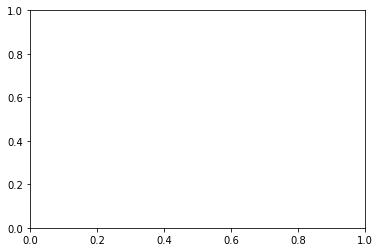

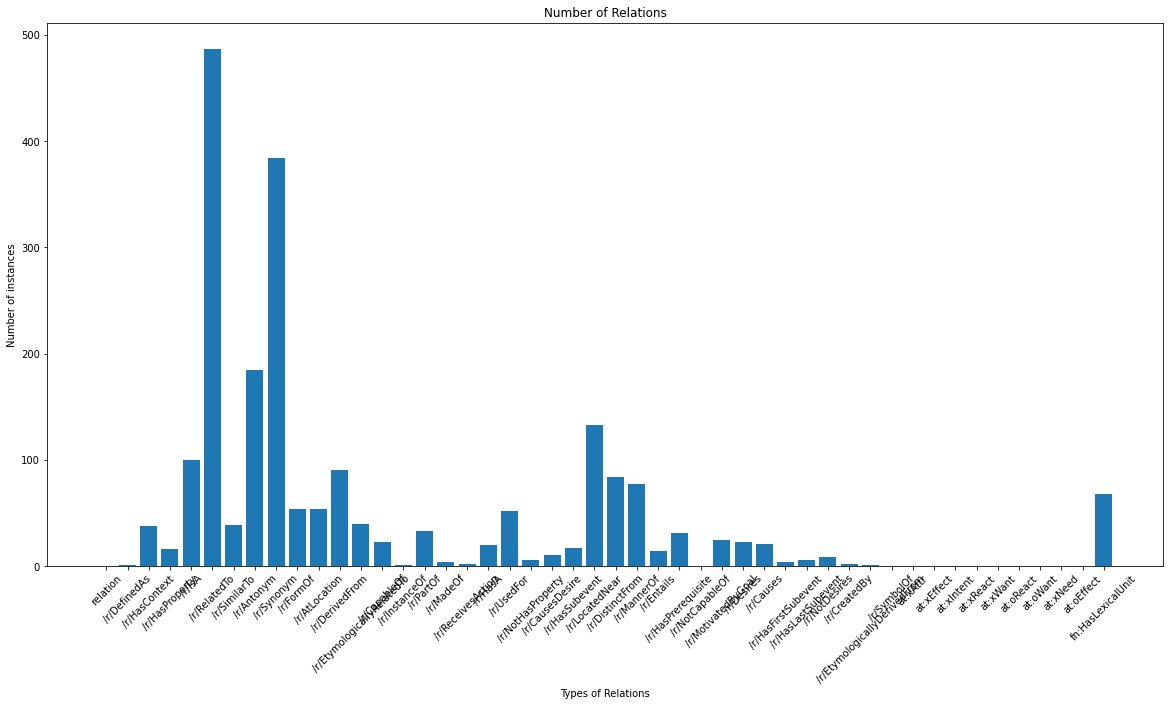

In [14]:
f, ax = plt.subplots()

plt.figure(figsize=(20,10))
plt.bar(stats_for_two_hop_relations_right.keys(), stats_for_two_hop_relations_right.values())
plt.title("Number of Relations")
plt.xlabel("Types of Relations")
plt.ylabel("Number of instances")

plt.xticks(rotation=45)

plt.show()

In [16]:
def relation_outline_two_hops(df): 
  for index,row in df.iterrows(): 
    print(row['node_1_label_x'], ' ', row['relation_x'], ' ', row['node_2_label_x'], ' ', row['relation_y'],' ', row['node_2_label_y'] )


In [17]:
two_hop_relations_keywords[8][0]


,Unnamed: 0_x,node_1_label_x,relation_x,node_2_label_x,Unnamed: 0_y,node_1_label_y,relation_y,node_2_label_y
0,710435,decide,/r/Causes,decide,710435,decide,/r/Causes,decide
1,710436,decide,/r/Entails,debate,1070776,debate,/r/RelatedTo,decide
2,710443,decide,/r/MannerOf,determine,1137340,determine,/r/RelatedTo,decide
3,710443,decide,/r/MannerOf,determine,1137358,determine,/r/Synonym,decide
4,710443,decide,/r/MannerOf,determine,1137437,determine,/r/Synonym,decide
...,...,...,...,...,...,...,...,...
87,1076878,decide,/r/Synonym,will,4630742,will,/r/MannerOf,decide
88,1076881,decide,/r/RelatedTo,decider,1077092,decider,/r/DerivedFrom,decide
89,1076881,decide,/r/RelatedTo,decider,1077093,decider,/r/DerivedFrom,decide
90,1076896,decide,/r/Synonym,make up one's mind,2469678,make up one's mind,/r/RelatedTo,decide


In [28]:
one_hop_relations_keywords[8]

[('stereo', 'music', ['/r/RelatedTo'])]

In [19]:
two_hop_relations_keywords[8][1]

,Unnamed: 0_x,node_1_label_x,relation_x,node_2_label_x,Unnamed: 0_y,node_1_label_y,relation_y,node_2_label_y
0,1076813,decide,/r/RelatedTo,abstract,20316,abstract,/r/HasContext,music
1,1076814,decide,/r/RelatedTo,action,45151,action,/r/HasContext,music
2,1076837,decide,/r/RelatedTo,pick,3113375,pick,/r/HasContext,music
3,1076837,decide,/r/RelatedTo,pick,3113412,pick,/r/HasContext,music
4,1076867,decide,/r/Synonym,pick,3113375,pick,/r/HasContext,music
5,1076867,decide,/r/Synonym,pick,3113412,pick,/r/HasContext,music
6,1076897,decide,/r/Synonym,pick,3113375,pick,/r/HasContext,music
7,1076897,decide,/r/Synonym,pick,3113412,pick,/r/HasContext,music
8,1076840,decide,/r/RelatedTo,take,4109548,take,/r/HasContext,music
9,1076861,decide,/r/Synonym,figure,1536339,figure,/r/HasContext,music


In [20]:
two_hop_relations_keywords[8][2]

,Unnamed: 0_x,node_1_label_x,relation_x,node_2_label_x,Unnamed: 0_y,node_1_label_y,relation_y,node_2_label_y
0,3967715,stereo,/r/Antonym,monophonic,2645330,monophonic,/r/HasContext,music
1,3967715,stereo,/r/Antonym,monophonic,2645342,monophonic,/r/HasContext,music
2,3967750,stereo,/r/Antonym,monophonic,2645330,monophonic,/r/HasContext,music
3,3967750,stereo,/r/Antonym,monophonic,2645342,monophonic,/r/HasContext,music
4,3967719,stereo,/r/AtLocation,party,3008073,party,/r/RelatedTo,music
5,3967738,stereo,/r/Synonym,radio,3381610,radio,/r/RelatedTo,music
6,3967766,stereo,/r/LocatedNear,stand,345946,stand,/r/LocatedNear,music
7,3967773,stereo,/r/LocatedNear,counter,951714,counter,/r/HasContext,music


In [21]:
two_hop_relations_keywords[8][3]

,Unnamed: 0_x,node_1_label_x,relation_x,node_2_label_x,Unnamed: 0_y,node_1_label_y,relation_y,node_2_label_y
0,74560,afford,/r/RelatedTo,range,3396058,range,/r/HasContext,music
1,74574,afford,/r/Synonym,open,2889278,open,/r/HasContext,music
2,74578,afford,/r/Synonym,stand,345946,stand,/r/LocatedNear,music
3,74581,afford,/r/Synonym,sustain,4075112,sustain,/r/HasContext,music
4,74591,afford,/r/RelatedTo,produce,3281713,produce,/r/HasContext,music
5,74600,afford,/r/Synonym,produce,3281713,produce,/r/HasContext,music


In [22]:
dataset['source_article'][8]

'Either you decide that you can afford this stereo, or decide not to have music for a while'

In [26]:
dataset['choice_1_not_stemmed'][8]

"['decide', 'stereo', 'afford']"

In [27]:
dataset['choice_2_not_stemmed'][8]

"['decide', 'music']"

In [23]:
one_hop_relations_keywords[8]

[('decide', 'music', []),
 ('stereo', 'decide', []),
 ('stereo', 'music', ['/r/RelatedTo']),
 ('afford', 'decide', []),
 ('afford', 'music', [])]

In [51]:
len(two_hop_relations_keywords[35])

11

In [53]:
two_hop_relations_keywords[35][1]

,Unnamed: 0_x,node_1_label_x,relation_x,node_2_label_x,Unnamed: 0_y,node_1_label_y,relation_y,node_2_label_y
0,1451168,expect,/r/Synonym,bear,365892,bear,/r/RelatedTo,strong
1,1451173,expect,/r/Synonym,demand,1103736,demand,/r/RelatedTo,strong


In [29]:
import networkx as nx 

G = nx.DiGraph() 

In [33]:
G.add_node(1, word = one_hop_relations_keywords[8][0][0]) 
G.add_node(2, word = one_hop_relations_keywords[8][0][1])

G.add_edge(one_hop_relations_keywords[8][0][0], one_hop_relations_keywords[8][0][1], weight = 1.2) 


In [34]:
G.graph

{}

In [3]:
two_hop = [('/r/RelatedTo', 455),
 ('/r/Synonym', 416),
 ('/r/Antonym', 199),
 ('/r/IsA', 150),
 ('/r/LocatedNear', 131),
 ('/r/MannerOf', 87),
 ('/r/DistinctFrom', 79),
 ('/r/AtLocation', 59),
 ('/r/UsedFor', 46),
 ('/r/HasContext', 36),
 ('/r/CapableOf', 36),
 ('/r/HasA', 32),
 ('/r/EtymologicallyRelatedTo', 30),
 ('/r/SimilarTo', 27),
 ('/r/CausesDesire', 21),
 ('/r/HasPrerequisite', 21),
 ('/r/DerivedFrom', 19),
 ('/r/Causes', 19),
 ('/r/HasProperty', 17),
 ('/r/Desires', 16),
 ('/r/PartOf', 15),
 ('fn:HasLexicalUnit', 14),
 ('/r/HasSubevent', 12),
 ('/r/Entails', 11),
 ('/r/MotivatedByGoal', 10),
 ('/r/MadeOf', 9),
 ('/r/FormOf', 8),
 ('/r/HasFirstSubevent', 8),
 ('/r/NotDesires', 8),
 ('/r/HasLastSubevent', 7),
 ('/r/CreatedBy', 7),
 ('/r/ReceivesAction', 3),
 ('/r/NotHasProperty', 2),
 ('relation', 0),
 ('/r/DefinedAs', 0),
 ('/r/InstanceOf', 0),
 ('/r/NotCapableOf', 0),
 ('/r/EtymologicallyDerivedFrom', 0),
 ('/r/SymbolOf', 0),
 ('at:xAttr', 0),
 ('at:xEffect', 0),
 ('at:xIntent', 0),
 ('at:xReact', 0),
 ('at:xWant', 0),
 ('at:oReact', 0),
 ('at:oWant', 0),
 ('at:xNeed', 0),
 ('at:oEffect', 0)] 


relation, value = [], [] 
for elt in two_hop: 
  relation.append(elt[0]) 
  value.append(elt[1]) 


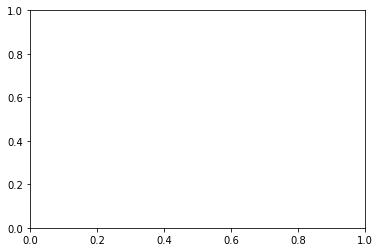

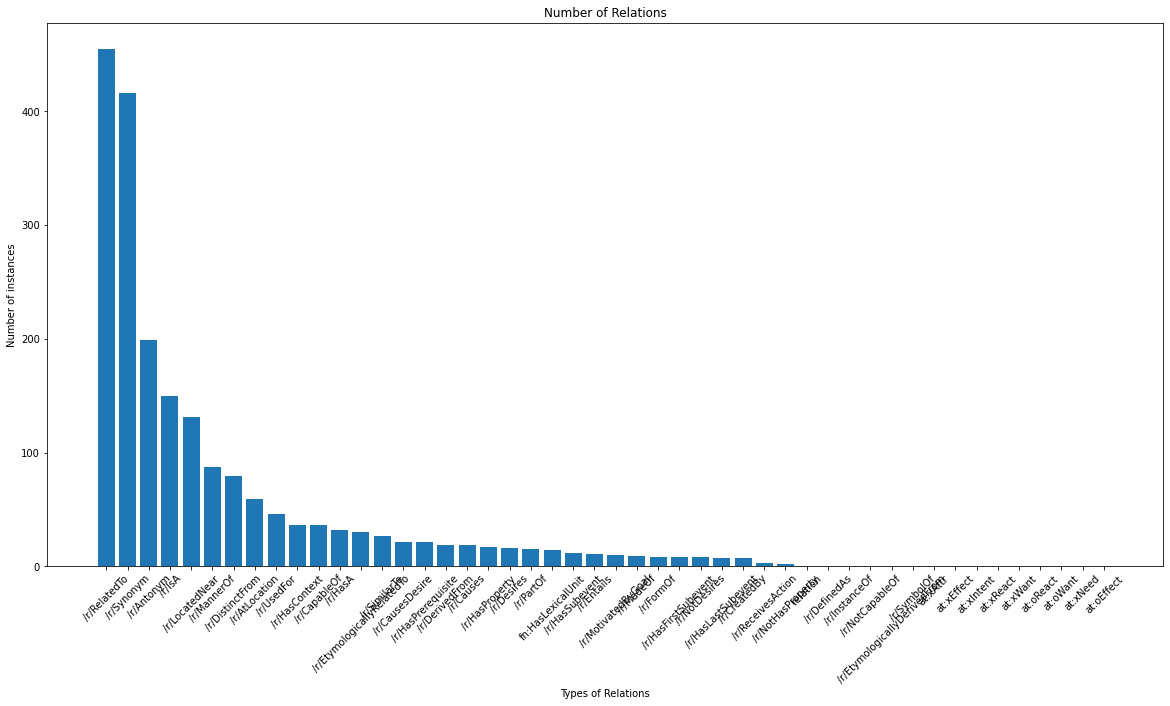

In [4]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

plt.figure(figsize=(20,10))
plt.bar(relation, value)
plt.title("Number of Relations")
plt.xlabel("Types of Relations")
plt.ylabel("Number of instances")

plt.xticks(rotation=45)

plt.show()

In [5]:
one_hop = [('/r/RelatedTo', 154),
 ('/r/Antonym', 50),
 ('/r/Synonym', 30),
 ('/r/DistinctFrom', 22),
 ('/r/DerivedFrom', 12),
 ('/r/Desires', 12),
 ('/r/IsA', 10),
 ('/r/HasProperty', 8),
 ('/r/FormOf', 8),
 ('/r/LocatedNear', 8),
 ('/r/AtLocation', 6),
 ('/r/EtymologicallyRelatedTo', 6),
 ('/r/Causes', 6),
 ('/r/SimilarTo', 4),
 ('/r/HasA', 4),
 ('/r/HasPrerequisite', 4),
 ('fn:HasLexicalUnit', 4),
 ('/r/CapableOf', 2),
 ('/r/MadeOf', 2),
 ('/r/UsedFor', 2),
 ('/r/CausesDesire', 2),
 ('/r/MannerOf', 2),
 ('/r/MotivatedByGoal', 2),
 ('/r/CreatedBy', 2),
 ('relation', 0),
 ('/r/DefinedAs', 0),
 ('/r/HasContext', 0),
 ('/r/InstanceOf', 0),
 ('/r/PartOf', 0),
 ('/r/ReceivesAction', 0),
 ('/r/NotHasProperty', 0),
 ('/r/HasSubevent', 0),
 ('/r/Entails', 0),
 ('/r/NotCapableOf', 0),
 ('/r/HasFirstSubevent', 0),
 ('/r/HasLastSubevent', 0),
 ('/r/NotDesires', 0),
 ('/r/EtymologicallyDerivedFrom', 0),
 ('/r/SymbolOf', 0),
 ('at:xAttr', 0),
 ('at:xEffect', 0),
 ('at:xIntent', 0),
 ('at:xReact', 0),
 ('at:xWant', 0),
 ('at:oReact', 0),
 ('at:oWant', 0),
 ('at:xNeed', 0),
 ('at:oEffect', 0)]

In [6]:
relation, value = [], [] 
for elt in one_hop: 
  relation.append(elt[0]) 
  value.append(elt[1]) 

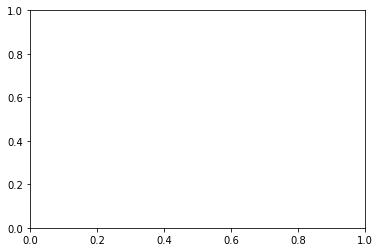

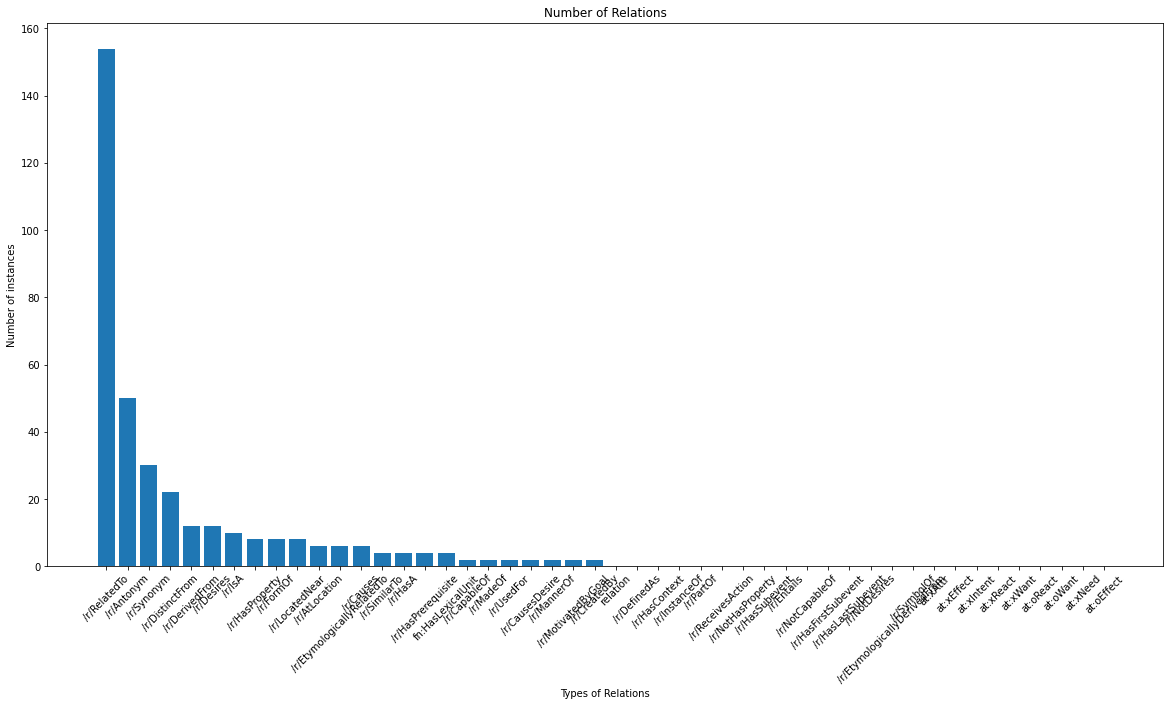

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

plt.figure(figsize=(20,10))
plt.bar(relation, value)
plt.title("Number of Relations")
plt.xlabel("Types of Relations")
plt.ylabel("Number of instances")

plt.xticks(rotation=45)

plt.show()